In [6]:
# speedup of resnet
import pandas as pd

path_ecr = "singleECR.txt"
path_pecr = "batchedECR.txt"

time_ecr = pd.read_csv(path_ecr, header = None, dtype = float)
time_pecr = pd.read_csv(path_pecr, header = None, dtype = float)

time_ocpa_ecr = []
time_ocpa_pecr = []
for i in range(0, 47):
    time_ocpa_ecr.append(time_ecr.iat[i, 0])
for i in range(0,47):
    time_ocpa_pecr.append(time_pecr.iat[i, 0])

In [7]:
path_cu_gemm = "cuDNN_gemm.txt"
path_cu_imp = "cuDNN_imp_gemm.txt"
path_cu_fft = "cuDNN_fft.txt"

time_gemm = pd.read_csv(path_cu_gemm, header=None, dtype=float)
time_imp = pd.read_csv(path_cu_imp, header=None, dtype=float)
time_fft = pd.read_csv(path_cu_fft, header=None, dtype=float)

time_cudnn_gemm = []
time_cudnn_imp = []
time_cudnn_fft = []

for i in range(0, 47):
    time_cudnn_gemm.append(time_gemm.iat[i, 0])
for i in range(0, 47):
    time_cudnn_imp.append(time_imp.iat[i, 0])
for i in range(0, 47):
    time_cudnn_fft.append(time_fft.iat[i, 0])


print("CUDNN GEMM")
print(time_cudnn_gemm)
print("CUDNN IMPLICIT GEMM")
print(time_cudnn_imp)
print("CUDNN FFT")
print(time_cudnn_fft)

CUDNN GEMM
[0.542432, 0.54144, 0.519072, 0.547648, 0.540032, 0.521792, 0.52496, 0.529952, 0.519744, 0.521152, 0.5264, 0.5112, 0.516288, 0.531072, 0.518112, 0.536704, 0.53696, 0.51264, 0.508992, 0.535712, 0.518112, 0.534976, 0.646496, 0.587328, 0.734176, 0.544928, 0.597344, 0.568544, 0.637024, 0.52656, 0.627232, 0.685792, 0.526496, 0.542464, 0.570848, 0.587232, 0.651584, 0.6736, 0.53456, 0.536608, 0.531136, 0.804032, 0.677184, 0.534912, 0.524096, 0.534368, 0.72368]
CUDNN IMPLICIT GEMM
[0.521568, 0.559904, 0.52576, 0.52336, 0.565568, 0.554464, 0.529536, 0.513856, 0.531968, 0.58128, 0.52944, 0.533472, 0.578816, 0.518688, 0.63072, 0.78368, 0.673952, 0.532032, 0.919968, 0.527232, 0.520352, 0.540544, 0.52528, 1.28829, 0.768768, 0.64128, 0.589344, 0.748096, 1.21677, 0.638784, 0.622784, 1.0231, 0.6736, 0.625984, 0.63792, 0.829984, 0.644768, 0.72624, 0.78976, 0.882496, 0.754208, 0.740864, 0.785952, 0.7152, 0.916064, 1.2992, 1.25117]
CUDNN FFT
[8.78867, 0.634752, 0.572256, 0.606144, 0.58416, 0.5

In [8]:
times_cudnn_gemm_vs_ecr = []
times_cudnn_imp_vs_ecr = []
times_cudnn_fft_vs_ecr = []

times_cudnn_gemm_vs_pecr = []
times_cudnn_imp_vs_pecr = []
times_cudnn_fft_vs_pecr = []

for i in range(0, 47):
    times_cudnn_gemm_vs_ecr.append(time_cudnn_gemm[i]/time_ocpa_ecr[i])
    times_cudnn_gemm_vs_pecr.append(time_cudnn_gemm[i]/time_ocpa_pecr[i])

for i in range(0, 47):
    times_cudnn_imp_vs_ecr.append(time_cudnn_imp[i]/time_ocpa_ecr[i])
    times_cudnn_imp_vs_pecr.append(time_cudnn_imp[i]/time_ocpa_pecr[i])

for i in range(0, 47):
    times_cudnn_fft_vs_ecr.append(time_cudnn_fft[i]/time_ocpa_ecr[i])
    times_cudnn_fft_vs_pecr.append(time_cudnn_fft[i]/time_ocpa_pecr[i])

print("SPEED UP VALUES OF ECR OVER CUDNN GEMM")
print(times_cudnn_gemm_vs_ecr)
print("SPEED UP VALUES OF ECR OVER CUDNN IMPLICIT GEMM")
print(times_cudnn_imp_vs_ecr)
print("SPEED UP VALUES OF ECR OVER CUDNN FFT")
print(times_cudnn_fft_vs_ecr)

print("SPEED UP VALUES OF PECR OVER CUDNN GEMM")
print(times_cudnn_gemm_vs_pecr)
print("SPEED UP VALUES OF PECR OVER CUDNN IMPLICIT GEMM")
print(times_cudnn_imp_vs_pecr)
print("SPEED UP VALUES OF PECR OVER CUDNN FFT")
print(times_cudnn_fft_vs_pecr)

SPEED UP VALUES OF ECR OVER CUDNN GEMM
[3.262945139557267, 3.125230882896195, 1.54854415274463, 3.067025089605735, 3.196817579086948, 1.9125029322073657, 2.8826216833596905, 2.9642026132092356, 3.0685811449083693, 2.937590187590187, 3.0736173393124067, 2.995499718732421, 3.1517874584879855, 3.3325301204819278, 3.2074088748019016, 2.675813656668794, 3.2368827160493825, 3.1516820775132794, 3.1761182108626196, 3.2922320550639133, 3.3117201881775413, 3.308529586384326, 3.9145514435186977, 3.643835616438356, 4.747154976205256, 3.3780995834159886, 3.7052401746724892, 2.0914655679811656, 3.840825776577272, 2.628594249201278, 3.894496324259885, 4.2437623762376235, 2.7136730991258453, 3.3931144915932747, 3.6016555622854836, 3.701290843081888, 4.10110775427996, 2.470657276995305, 3.253798208024932, 3.4355664822782215, 2.61591804570528, 5.173152151533868, 4.259661835748792, 2.600497822028625, 3.204460966542751, 2.9508747128467925, 4.558556742592219]
SPEED UP VALUES OF ECR OVER CUDNN IMPLICIT GEMM

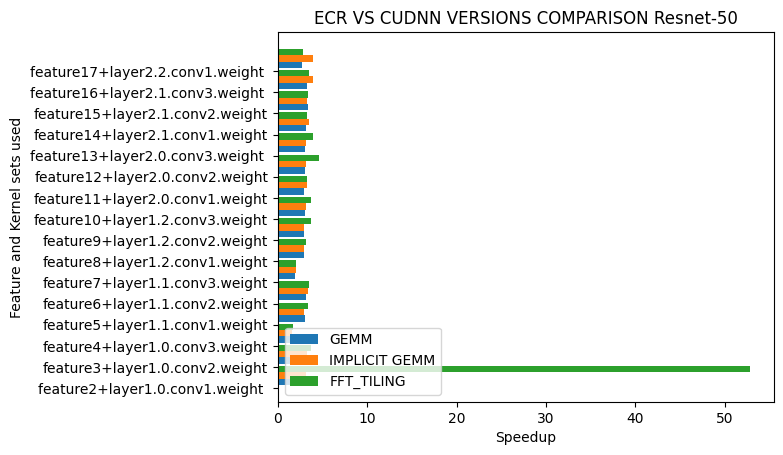

In [9]:
import numpy as np
import matplotlib.pyplot as plt 

x_axis = np.arange(16)
feature_and_kernels_used = ["feature2+layer1.0.conv1.weight ","feature3+layer1.0.conv2.weight",
"feature4+layer1.0.conv3.weight",
"feature5+layer1.1.conv1.weight",
"feature6+layer1.1.conv2.weight",
"feature7+layer1.1.conv3.weight",
"feature8+layer1.2.conv1.weight",
"feature9+layer1.2.conv2.weight",
"feature10+layer1.2.conv3.weight",
"feature11+layer2.0.conv1.weight",
"feature12+layer2.0.conv2.weight",
"feature13+layer2.0.conv3.weight ",
"feature14+layer2.1.conv1.weight",
"feature15+layer2.1.conv2.weight",
"feature16+layer2.1.conv3.weight ",
"feature17+layer2.2.conv1.weight "]

# Horizontal bar charts
plt.barh(x_axis+0.30, times_cudnn_gemm_vs_ecr[:16], height=0.3, label="GEMM")
plt.barh(x_axis+0.30*2, times_cudnn_imp_vs_ecr[:16], height=0.3, label="IMPLICIT GEMM")
plt.barh(x_axis+0.30*3, times_cudnn_fft_vs_ecr[:16], height=0.3, label="FFT_TILING")

# yticks
plt.yticks(x_axis, feature_and_kernels_used)


# add ylabel and xlabel
plt.title("ECR VS CUDNN VERSIONS COMPARISON Resnet-50")
plt.ylabel("Feature and Kernel sets used")
plt.xlabel("Speedup")

# add legend 
plt.legend(loc=3)
# display chart
plt.show()

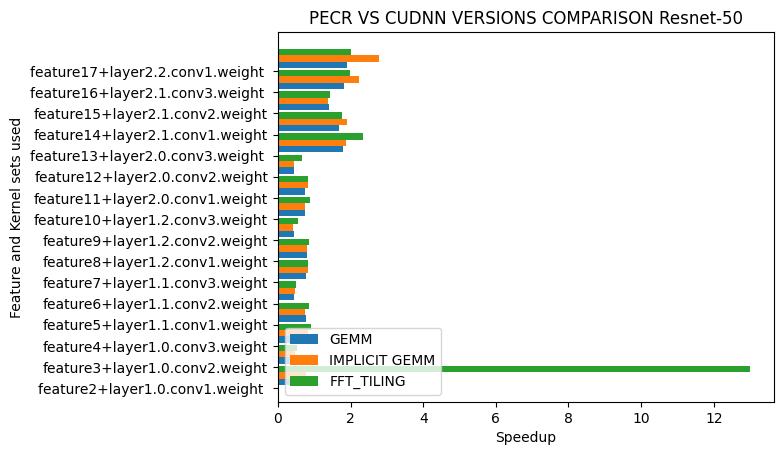

In [10]:
import numpy as np
import matplotlib.pyplot as plt 

x_axis = np.arange(16)
feature_and_kernels_used = ["feature2+layer1.0.conv1.weight ","feature3+layer1.0.conv2.weight",
"feature4+layer1.0.conv3.weight",
"feature5+layer1.1.conv1.weight",
"feature6+layer1.1.conv2.weight",
"feature7+layer1.1.conv3.weight",
"feature8+layer1.2.conv1.weight",
"feature9+layer1.2.conv2.weight",
"feature10+layer1.2.conv3.weight",
"feature11+layer2.0.conv1.weight",
"feature12+layer2.0.conv2.weight",
"feature13+layer2.0.conv3.weight ",
"feature14+layer2.1.conv1.weight",
"feature15+layer2.1.conv2.weight",
"feature16+layer2.1.conv3.weight ",
"feature17+layer2.2.conv1.weight "]

# Horizontal bar charts
plt.barh(x_axis+0.30, times_cudnn_gemm_vs_pecr[:16], height=0.3, label="GEMM")
plt.barh(x_axis+0.30*2, times_cudnn_imp_vs_pecr[:16], height=0.3, label="IMPLICIT GEMM")
plt.barh(x_axis+0.30*3, times_cudnn_fft_vs_pecr[:16], height=0.3, label="FFT_TILING")

# yticks
plt.yticks(x_axis, feature_and_kernels_used)


# add ylabel and xlabel
plt.title("PECR VS CUDNN VERSIONS COMPARISON Resnet-50")
plt.ylabel("Feature and Kernel sets used")
plt.xlabel("Speedup")

# add legend 
plt.legend(loc=3)
# display chart
plt.show()